## Decision tree algorithm

เป็นการนำข้อมูลมาทำเป็นต้นไม้ตัดสินใจ เพื่อคาดการณ์ทิศทางของผู้ใช้งานว่าจะเป็นผู้ใช้งานรูปแบบใด

เริ่มจากการ import ข้อมูลเข้ามา

In [72]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import category_encoders as ce
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline


ทำการ load ข้อมูล โดยที่จะทำการ format rows ที่เป็น yes no ให้เป็น 0 และ 1

In [73]:
column_names = [
  'branch',
  'city',
  'customer_type',
  'gender',
  'health_and_beauty',
  'electronic_accessories',
  'home_and_lifestyle',
  'sports_and_travel',
  'food_and_beverages',
  'fashion_accessories',
  'unit_price',
  'quantity',
  'tax',
  'total',
  'payment',
  'cogs',
  'rating'
]

df = pd.read_csv('./attribute1.csv', header=None,
                 skiprows=[0], names=column_names)

df[['health_and_beauty', 'electronic_accessories', 'home_and_lifestyle', 'sports_and_travel', 'food_and_beverages', 'fashion_accessories']] = df[['health_and_beauty', 'electronic_accessories', 'home_and_lifestyle', 'sports_and_travel', 'food_and_beverages', 'fashion_accessories']].eq('Yes').astype(int)

print(df.head())


  branch       city customer_type  gender  health_and_beauty  \
0      A     Yangon        Member  Female                  1   
1      C  Naypyitaw        Normal  Female                  0   
2      A     Yangon        Normal    Male                  0   
3      A     Yangon        Member    Male                  1   
4      A     Yangon        Normal    Male                  0   

   electronic_accessories  home_and_lifestyle  sports_and_travel  \
0                       0                   0                  0   
1                       1                   0                  0   
2                       0                   1                  0   
3                       0                   0                  0   
4                       0                   0                  1   

   food_and_beverages  fashion_accessories  unit_price  quantity  tax  total  \
0                   0                    0          32         7   13    237   
1                   0                    0    

ตรวจสอบจำนวนข้อมูลในแต่ละคอลัมน์

In [74]:
for col in column_names:
  print(df[col].value_counts())


A    340
B    332
C    328
Name: branch, dtype: int64
Yangon       340
Mandalay     332
Naypyitaw    328
Name: city, dtype: int64
Member    501
Normal    499
Name: customer_type, dtype: int64
Female    501
Male      499
Name: gender, dtype: int64
0    848
1    152
Name: health_and_beauty, dtype: int64
0    830
1    170
Name: electronic_accessories, dtype: int64
0    840
1    160
Name: home_and_lifestyle, dtype: int64
0    834
1    166
Name: sports_and_travel, dtype: int64
0    826
1    174
Name: food_and_beverages, dtype: int64
0    822
1    178
Name: fashion_accessories, dtype: int64
83    22
44    22
32    21
79    18
26    18
      ..
84     7
55     7
71     6
73     6
81     5
Name: unit_price, Length: 81, dtype: int64
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: quantity, dtype: int64
13    113
20    102
11    101
10     94
12     91
18     89
15     85
17     84
19     84
16     79
14     78
Name: tax, dtype: int64
280

ทำการทำ train test split ของข้อมูล

In [75]:
x = df.drop(['rating'], axis=1, inplace=False)
y = df['rating']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=112233)


ทำการ encode categorical data ให้เป็น number

In [76]:
encoder = ce.OrdinalEncoder(
    cols=['branch', 'city', 'customer_type', 'gender', 'payment'])

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

print(x_train.head())


     branch  city  customer_type  gender  health_and_beauty  \
399       1     1              1       1                  0   
995       2     2              2       1                  1   
808       1     1              2       2                  1   
936       2     2              2       2                  1   
476       3     3              2       2                  0   

     electronic_accessories  home_and_lifestyle  sports_and_travel  \
399                       1                   0                  0   
995                       0                   0                  0   
808                       0                   0                  0   
936                       0                   0                  0   
476                       0                   0                  1   

     food_and_beverages  fashion_accessories  unit_price  quantity  tax  \
399                   0                    0          44         9   12   
995                   0                    0      

## สร้าง Decision tree จาก Entropy (information gain) method

In [77]:
clf_entropy = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, random_state=112233)

clf_entropy.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=112233)

ทำการวัดผลโมเดล

In [78]:
y_predicted_entropy = clf_entropy.predict(x_test)


ดูผลลัพธ์ของการวัดผลสำหรับ test set

In [79]:
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(
    accuracy_score(y_test, y_predicted_entropy)))


Model accuracy score with criterion entropy index: 0.4500


In [80]:
y_predicted_train_entropy = clf_entropy.predict(x_train)

print(y_predicted_train_entropy)


['medium' 'medium' 'medium' 'medium' 'high' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'high' 'medium' 'high' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'high' 'high' 'high' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'high' 'medium' 'medium' 'medium' 'medium' 'medium' 'high' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'high' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'high' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'high' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'high'
 'medium' 'medium' 'high' 'high' 'medium' 'medium' 'medium' 'medium'
 'medi

ดูผลลัพธ์ของการวัดผลของ train set

In [81]:
print('Training-set accuracy score: {0:0.4f}'. format(
    accuracy_score(y_train, y_predicted_train_entropy)))


Training-set accuracy score: 0.5129


In [82]:
print('Training set score: {:.4f}'.format(clf_entropy.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_entropy.score(x_test, y_test)))


Training set score: 0.5129
Test set score: 0.4500


ทำการ plot tree จาก train model

[Text(0.5, 0.875, 'X[10] <= 25.5\nentropy = 1.326\nsamples = 700\nvalue = [287, 59, 354]'),
 Text(0.25, 0.625, 'X[15] <= 65.5\nentropy = 1.127\nsamples = 137\nvalue = [39, 7, 91]'),
 Text(0.125, 0.375, 'X[10] <= 21.5\nentropy = 0.877\nsamples = 54\nvalue = [16, 0, 38]'),
 Text(0.0625, 0.125, 'entropy = 0.939\nsamples = 45\nvalue = [16, 0, 29]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]'),
 Text(0.375, 0.375, 'X[15] <= 76.5\nentropy = 1.227\nsamples = 83\nvalue = [23, 7, 53]'),
 Text(0.3125, 0.125, 'entropy = 1.557\nsamples = 7\nvalue = [2, 3, 2]'),
 Text(0.4375, 0.125, 'entropy = 1.123\nsamples = 76\nvalue = [21, 4, 51]'),
 Text(0.75, 0.625, 'X[15] <= 781.5\nentropy = 1.351\nsamples = 563\nvalue = [248, 52, 263]'),
 Text(0.625, 0.375, 'X[10] <= 36.5\nentropy = 1.342\nsamples = 545\nvalue = [245, 48, 252]'),
 Text(0.5625, 0.125, 'entropy = 1.463\nsamples = 105\nvalue = [46, 16, 43]'),
 Text(0.6875, 0.125, 'entropy = 1.303\nsamples = 440\nvalue = [199, 32, 209]

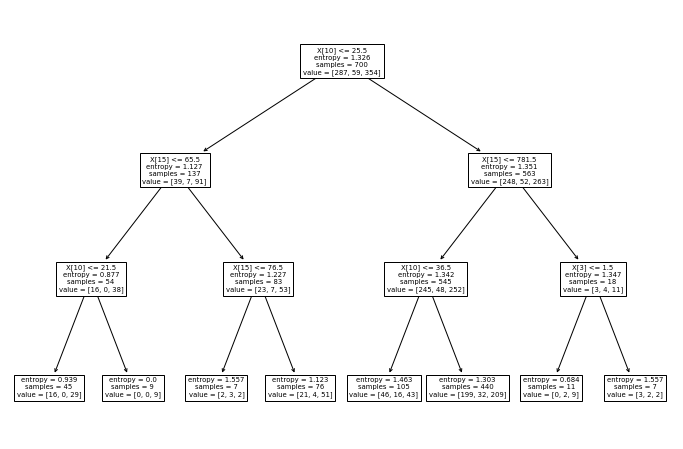

In [83]:
plt.figure(figsize=(12, 8))

tree.plot_tree(clf_entropy.fit(x_train, y_train))


ทำการนำกราฟไป plot ผ่าน graphviz

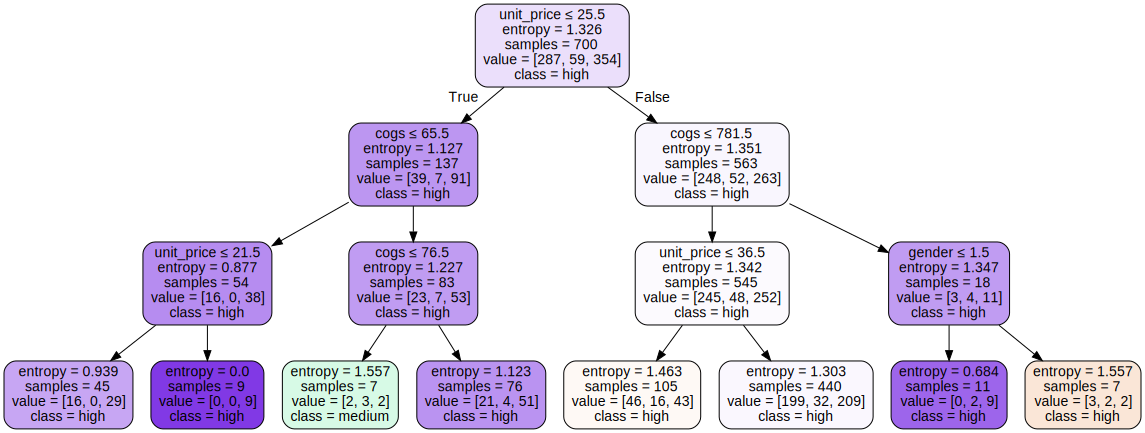

In [84]:
dot_data = tree.export_graphviz(clf_entropy, out_file=None, feature_names=x_train.columns, class_names=y_train.reset_index(drop=True), filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)

graph


ทำการคิด confusion matrix ออกมา

แต่ละ column มีค่า True Positive, True Negative, False Positive, False Negative

In [85]:
cm = confusion_matrix(y_test, y_predicted_entropy)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 16   2 108]
 [  4   0  22]
 [ 26   3 119]]


ทำการ generate classification report

In [86]:
print(classification_report(y_test, y_predicted_entropy))


              precision    recall  f1-score   support

        high       0.35      0.13      0.19       126
         low       0.00      0.00      0.00        26
      medium       0.48      0.80      0.60       148

    accuracy                           0.45       300
   macro avg       0.28      0.31      0.26       300
weighted avg       0.38      0.45      0.37       300

